# Pytorch-Based CNN Implementation
### COL341: Machine Learning A4
#### Viraj Agashe (2020CS10567)

**Base Implementation**


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [ ]:
# scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(trainloader), epochs=20)
# val_loss_4 = []
# val_loss_8 = []
# val_loss_16 = []
# val_loss_32= []

In [2]:
# Normalize the data
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(),
      transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:13<00:00, 12990394.35it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, stride=1)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64,64,3)
        self.fc1 = nn.Linear(64 * 22 * 22, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

In [7]:
net = Net()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

net.to(device)

cuda:0


Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=30976, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## **4.1 Hyper Parameter Tuning**
Effect of Learning Rate 

---
We train the Neural Network with various various of $\alpha$ and we observe the impact on the accuracies. 









In [9]:
train_loss = []
val_loss = []

for epoch in range(15):  # loop over the dataset multiple times
    print("Starting epoch: ", epoch)
    running_loss = 0.0
    train_step_loss = []
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        train_step_loss.append(loss.item())
        running_loss += loss.item()
        if i % 500 == 499:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 500:.5f}')
            running_loss = 0.0
    train_loss.append(np.array(train_step_loss).mean())
    # scheduler.step()

    with torch.no_grad():
      correct = 0
      total = 0
      val_step_loss = []
      for val_data in testloader:
          val_images, val_labels = val_data[0].to(device), val_data[1].to(device)
          v_outputs = net(val_images)
          v_loss = criterion(v_outputs, val_labels)
          val_step_loss.append(v_loss.item())
          _, predicted = torch.max(v_outputs.data, 1)
          total += val_labels.size(0)
          correct += (predicted == val_labels).sum().item()
      val_acc = correct/total
      print("Validation Accuracy after epoch {} is {:.3f}".format(epoch, val_acc))

    val_loss.append(np.array(val_step_loss).mean()) # Change here 
    # print("Validation Loss after epoch {} is {}".format(epoch, val_loss_4[-1])) # Change here
    # print("Validation acc")

print('Finished Training!')

Starting epoch:  0
[1,   500] loss: 2.18032
[1,  1000] loss: 1.81965
[1,  1500] loss: 1.56115
Validation Accuracy after epoch 0 is 0.439
Starting epoch:  1
[2,   500] loss: 1.44375
[2,  1000] loss: 1.37986
[2,  1500] loss: 1.30580
Validation Accuracy after epoch 1 is 0.552
Starting epoch:  2
[3,   500] loss: 1.26792
[3,  1000] loss: 1.21056
[3,  1500] loss: 1.17528
Validation Accuracy after epoch 2 is 0.583
Starting epoch:  3
[4,   500] loss: 1.09672
[4,  1000] loss: 1.06106
[4,  1500] loss: 1.04421
Validation Accuracy after epoch 3 is 0.619
Starting epoch:  4
[5,   500] loss: 0.98477
[5,  1000] loss: 0.95075
[5,  1500] loss: 0.94243
Validation Accuracy after epoch 4 is 0.671
Starting epoch:  5
[6,   500] loss: 0.88872
[6,  1000] loss: 0.87949
[6,  1500] loss: 0.85822
Validation Accuracy after epoch 5 is 0.696
Starting epoch:  6
[7,   500] loss: 0.82270
[7,  1000] loss: 0.80711
[7,  1500] loss: 0.78737
Validation Accuracy after epoch 6 is 0.697
Starting epoch:  7
[8,   500] loss: 0.747

<function matplotlib.pyplot.show(close=None, block=None)>

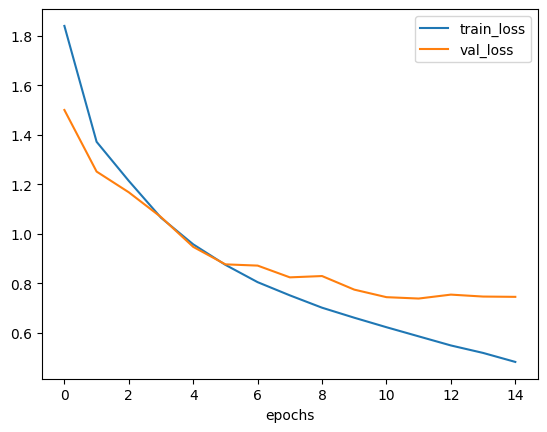

In [10]:
from matplotlib import pyplot as plt
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('epochs')
plt.legend()
plt.show

In [11]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Train Accuracy of the network: {100 * correct // total} %')

Train Accuracy of the network: 85 %


In [12]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy of the network on the 10000 test images: {100 * correct / total} %')

Test Accuracy of the network on the 10000 test images: 75.48 %


In [13]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 77.9 %
Accuracy for class: car   is 81.7 %
Accuracy for class: bird  is 66.9 %
Accuracy for class: cat   is 52.1 %
Accuracy for class: deer  is 74.9 %
Accuracy for class: dog   is 66.9 %
Accuracy for class: frog  is 84.4 %
Accuracy for class: horse is 75.1 %
Accuracy for class: ship  is 86.2 %
Accuracy for class: truck is 88.4 %


## Experimenting with LR Schedulers 

In [ ]:
# # optimizer = optim.Adam(net.parameters(), lr=0.001)

# net_lr = Net()
# net_lr.to(device)
# optimizer_new = optim.SGD(net_lr.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# train_loss  = []
# val_loss    = []

# for epoch in range(20):  # loop over the dataset multiple times
#     print("Starting epoch: ", epoch)
#     running_loss = 0.0
#     train_step_loss = []
#     for i, data in enumerate(trainloader, 0):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data[0].to(device), data[1].to(device)

#         # zero the parameter gradients
#         optimizer_new.zero_grad()

#         # forward + backward + optimize
#         outputs = net_lr(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer_new.step()

#         # print statistics
#         train_step_loss.append(loss.item())
#         running_loss += loss.item()
#         if i % 500 == 499:    # print every 100 mini-batches
#             print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 500:.5f}')
#             running_loss = 0.0
#     train_loss.append(np.array(train_step_loss).mean())

#     with torch.no_grad():
#       val_step_loss = []
#       for val_data in testloader:
#           val_images, val_labels = val_data[0].to(device), val_data[1].to(device)
#           v_outputs = net_lr(val_images)
#           v_loss = criterion(v_outputs, val_labels)
#           val_step_loss.append(v_loss.item())
#     val_loss.append(np.array(val_step_loss).mean())
#     print("Validation Loss after epoch {} is {}".format(epoch, val_loss[-1]))
#     scheduler.step()

# print('Finished Training!')

<function matplotlib.pyplot.show(close=None, block=None)>

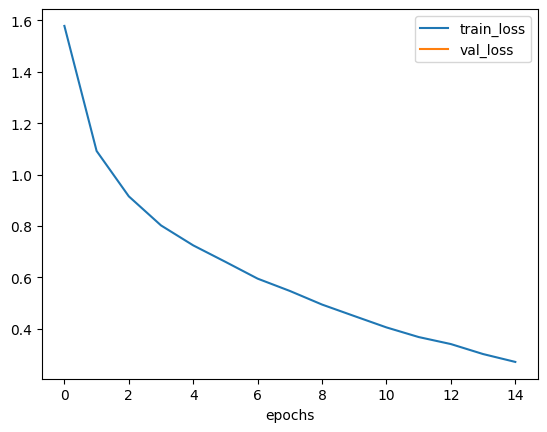

In [ ]:
from matplotlib import pyplot as plt
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('epochs')
plt.legend()
plt.show